# Memograph Detection Project

## Predict whether a mammogram mass is benign or malignant

We'll be using Wisconsin Breast Cancer Database.
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

This data contains 699 instances of masses detected in mammograms, and contains the following attributes:


   Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
  
  Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)
   



We are Appling several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10).

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression

The data needs to be cleaned; many rows contain missing data(to be specific 16), and there may be erroneous data identifiable as outliers as well.
We are using Sklearn libreary for these methods.




## preparing data

In [ ]:
import pandas as pd

masses_data = pd.read_csv('breast-cancer-wisconsin.data.txt')
masses_data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
masses_data = pd.read_csv('breast-cancer-wisconsin.data.txt', na_values=['?'], names = ['ID', 'Clump Thickness', 'Cell size uniformity', 'Cell shape uniformity', 'Marginal Adhesion', 'Cell size', 'Bare nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'mitosis','class'])
masses_data.head()

,ID,Clump Thickness,Cell size uniformity,Cell shape uniformity,Marginal Adhesion,Cell size,Bare nuclei,Bland Chromatin,Normal Nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Evaluating whether the data needs cleaning

In [ ]:
masses_data.describe()

,ID,Clump Thickness,Cell size uniformity,Cell shape uniformity,Marginal Adhesion,Cell size,Bare nuclei,Bland Chromatin,Normal Nucleoli,mitosis,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


There is no correlation between the NULL values, so we can remove rows with Null values.

In [ ]:
masses_data.loc[(masses_data['Clump Thickness'].isnull()) | (masses_data['Cell size uniformity'].isnull()) |
              (masses_data['Cell shape uniformity'].isnull()) | (masses_data['Marginal Adhesion'].isnull()) | (masses_data['Cell size'].isnull()) |
              (masses_data['Bare nuclei'].isnull()) | (masses_data['Bland Chromatin'].isnull()) |(masses_data['Normal Nucleoli'].isnull()) |
              (masses_data['mitosis'].isnull())]

,ID,Clump Thickness,Cell size uniformity,Cell shape uniformity,Marginal Adhesion,Cell size,Bare nuclei,Bland Chromatin,Normal Nucleoli,mitosis,class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


ID is not importent feature so we droped ID and NULL values.

In [ ]:
masses_data = masses_data.drop("ID", axis=1)
masses_data.dropna(inplace=True)
masses_data.describe()

,Clump Thickness,Cell size uniformity,Cell shape uniformity,Marginal Adhesion,Cell size,Bare nuclei,Bland Chromatin,Normal Nucleoli,mitosis,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Next we are converting the Pandas dataframes into numpy arrays that can be used by scikit_learn. Creating an array that extracts only the feature data we want to work with and another array that contains the classes (Output). We'll also need an array of the feature name labels.

In [ ]:
all_features = masses_data[['Clump Thickness', 'Cell size uniformity', 'Cell shape uniformity', 'Marginal Adhesion', 'Cell size', 'Bare nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'mitosis']].values


all_classes = masses_data['class'].values

feature_names = ['Clump Thickness', 'Cell size uniformity', 'Cell shape uniformity', 'Marginal Adhesion', 'Cell size', 'Bare nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'mitosis']

all_features

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

Some of our models require the input data to be normalized.We are using Standardscaler to generate 0 mean 1 variance output.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

## Decision Trees

Before moving to K-Fold cross validation and random forests, we start by creating a single train/test split of our data. Set aside 65% for training, and 35% for testing.

In [ ]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.9, test_size=0.1, random_state=1)

creating a DecisionTreeClassifier and fiting it to our training data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
end = time.time()
print(end - start)

0.0009975433349609375


Display the resulting decision tree.

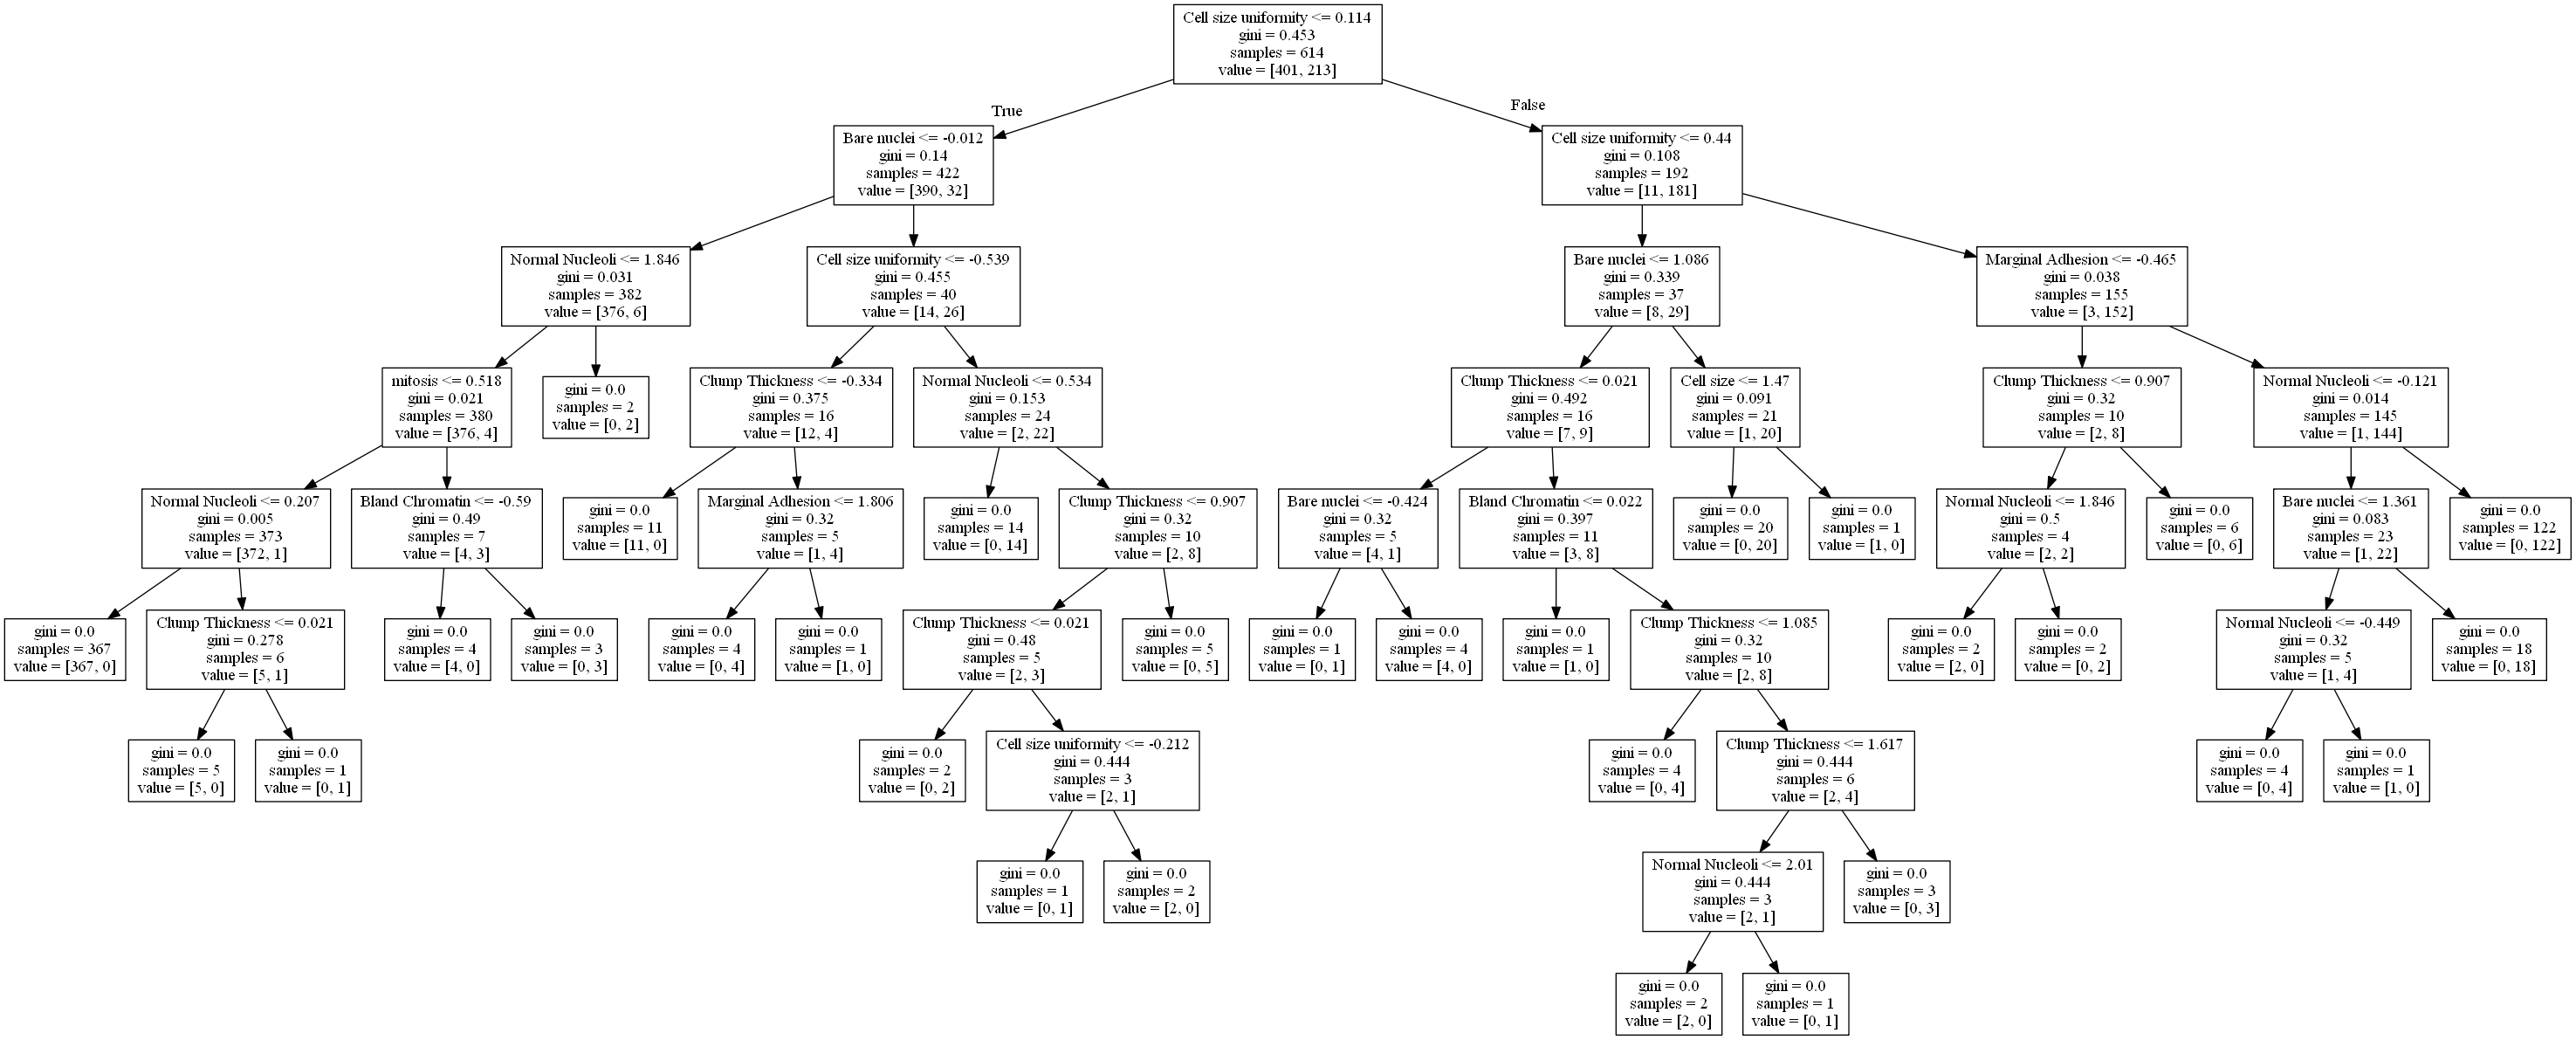

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Measure the accuracy of the resulting decision tree model using our test data.

In [ ]:
clf.score(testing_inputs, testing_classes)

0.9565217391304348

Now instead of a single train/test split, using K-Fold cross validation to get a better measure of your model's accuracy (K=10).

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==4:
           TP += 1
        if y_hat[i]==4 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==2:
           TN += 1
        if y_hat[i]==2 and y_actual[i]!=y_hat[i]:
           FN += 1
    
    return(TP, FP, TN, FN)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
start=time.time()
clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean())

clf.fit(training_inputs,training_classes)
y_pred=clf.predict(testing_inputs)
print(testing_classes[3])
y_pred=numpy.asarray(y_pred)
testing_classes=numpy.asarray(testing_classes)
TP,FP,TN,FN=perf_measure(testing_classes,y_pred)

print(TP,FP,TN,FN)
end = time.time()
print(end - start)

0.9473985570866892
4
24 1 42 2
0.019914865493774414


RandomForestClassifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier
start=time.time();
clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

print(cv_scores.mean())
end = time.time()
print(end - start)

0.9664961636828645
0.10572195053100586


## SVM
using linear kernel

In [ ]:
from sklearn import svm
start=time.time();
C = 1.0
svc = svm.SVC(kernel='linear', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)

print(cv_scores.mean())
end = time.time()
print(end - start)

0.9664315888587751
0.03888988494873047


## KNN
KNeighborsClassifier with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [ ]:
from sklearn import neighbors
start=time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

print(cv_scores.mean())
end = time.time()
print(end - start)

0.9650468883205455
0.04985857009887695


Choosing K is tricky, so we can't discard KNN until we've tried different values of K. Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference and noting down the best accuracy.

In [ ]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.9489763458920232
2 0.941644717588528
3 0.9606338512043363
4 0.9621263885177693
5 0.9693940782023386
6 0.9664742146047256
7 0.9694373401534527
8 0.9708866155157715
9 0.9679454390451834
10 0.9650468883205455
11 0.9694373401534527
12 0.967988064791134
13 0.9708866155157715
14 0.966538789428815
15 0.9650249392424068
16 0.965068201193521
17 0.9679448028400198
18 0.9635756638800881
19 0.9664955274777011
20 0.9665174765558397
21 0.9679234899670446
22 0.9679667519181585
23 0.9679667519181585
24 0.9665174765558397
25 0.9665174765558397
26 0.965068201193521
27 0.9635756638800881
28 0.965068201193521
29 0.9650249392424068
30 0.965068201193521
31 0.9635756638800881
32 0.9635756638800881
33 0.9635756638800881
34 0.9621263885177693
35 0.9621263885177693
36 0.9621696504688831
37 0.9635756638800881
38 0.9636189258312022
39 0.9621263885177693
40 0.9606771131554502
41 0.9606771131554502
42 0.9606771131554502
43 0.9606771131554502
44 0.9606771131554502
45 0.9606771131554502
46 0.9606771131554502
47 0

## Naive Bayes

Now trying naive_bayes.MultinomialNB.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
start=time.time()
scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(all_features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, all_classes, cv=10)

print(cv_scores.mean())
end = time.time()
print(end - start)

0.9094603707803695
0.01492762565612793


## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is.

In [ ]:
C = 1.0
start=time.time()
svc = svm.SVC(kernel='rbf', C=C,gamma='auto')
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean())
end = time.time()
print(end - start)

0.9664742146047256
0.04188823699951172


In [ ]:
C = 1.0
start=time.time()
svc = svm.SVC(kernel='sigmoid', C=C,gamma='auto')
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean())
end = time.time()
print(end - start)

0.9619972388695907
0.028890132904052734


In [ ]:
C = 1.0
start=time.time()
svc = svm.SVC(kernel='poly', C=C,gamma='auto')
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean())
end = time.time()
print(end - start)

0.9563299232736574
0.03095078468322754


## Logistic Regression

Fundamentally this is just a binary classification problem. So, Logisitic Regression, which is a simple way to tackling this sort of thing.

In [ ]:
from sklearn.linear_model import LogisticRegression
start=time.time()
clf = LogisticRegression(solver='liblinear')
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean())
end = time.time()
print(end - start)

0.9694373401534527
0.025895357131958008
